In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Nama file mentah Anda (hasil convert dari .nc)
file_path = "no2_output.csv"

# Data Understanding

In [2]:

print(f"Memuat file: {file_path}")
try:
    # Penting: Kita harus menggabungkan pengetahuan kita:
    # 1. Dari SS teman Anda: Membaca file
    # 2. Dari TUGAS LAMA kita: File ini punya missing value '--'
    df = pd.read_csv(
        file_path,
        parse_dates=['Time'], # Langsung ubah 'Time' jadi datetime
        na_values='--'      # KUNCI: Tetap deteksi '--' sebagai NaN
    )
    
    print("\n" + "="*30 + "\n")
    print("--- 10 Baris Pertama (df.head) ---")
    print(df.head(10))

    print("\n" + "="*30 + "\n")
    print("--- Info Dasar Dataset (df.info) ---")
    # df.info() akan dijalankan di bawah, digabung dengan print
    df.info()

    print("\n" + "="*30 + "\n")
    print("--- Statistik Deskriptif (df.describe) ---")
    print(df.describe(include='all'))

    print("\n" + "="*30 + "\n")
    print("--- Jumlah Missing Value Awal (dari '--') ---")
    print(df.isnull().sum())
    print("\n" + "="*30 + "\n")

except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
    print("Pastikan file 'no2_output.csv' sudah di-upload ke Colab.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")

Memuat file: no2_output.csv


--- 10 Baris Pertama (df.head) ---
        Time  Latitude (y)  Longitude (x)       NO2
0 2021-01-01     -7.023175     112.765031       NaN
1 2021-01-02     -7.023175     112.765031       NaN
2 2021-01-03     -7.023175     112.765031  0.000034
3 2021-01-04     -7.023175     112.765031       NaN
4 2021-01-05     -7.023175     112.765031       NaN
5 2021-01-06     -7.023175     112.765031       NaN
6 2021-01-07     -7.023175     112.765031       NaN
7 2021-01-08     -7.023175     112.765031       NaN
8 2021-01-09     -7.023175     112.765031       NaN
9 2021-01-10     -7.023175     112.765031       NaN


--- Info Dasar Dataset (df.info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           1739 non-null   datetime64[ns]
 1   Latitude (y)   1739 non-null   float64       
 2   Longitude

Membuat visualisasi data...


C:\Users\FIKRI\AppData\Local\Temp\ipykernel_4596\3703067344.py:26: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\FIKRI\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


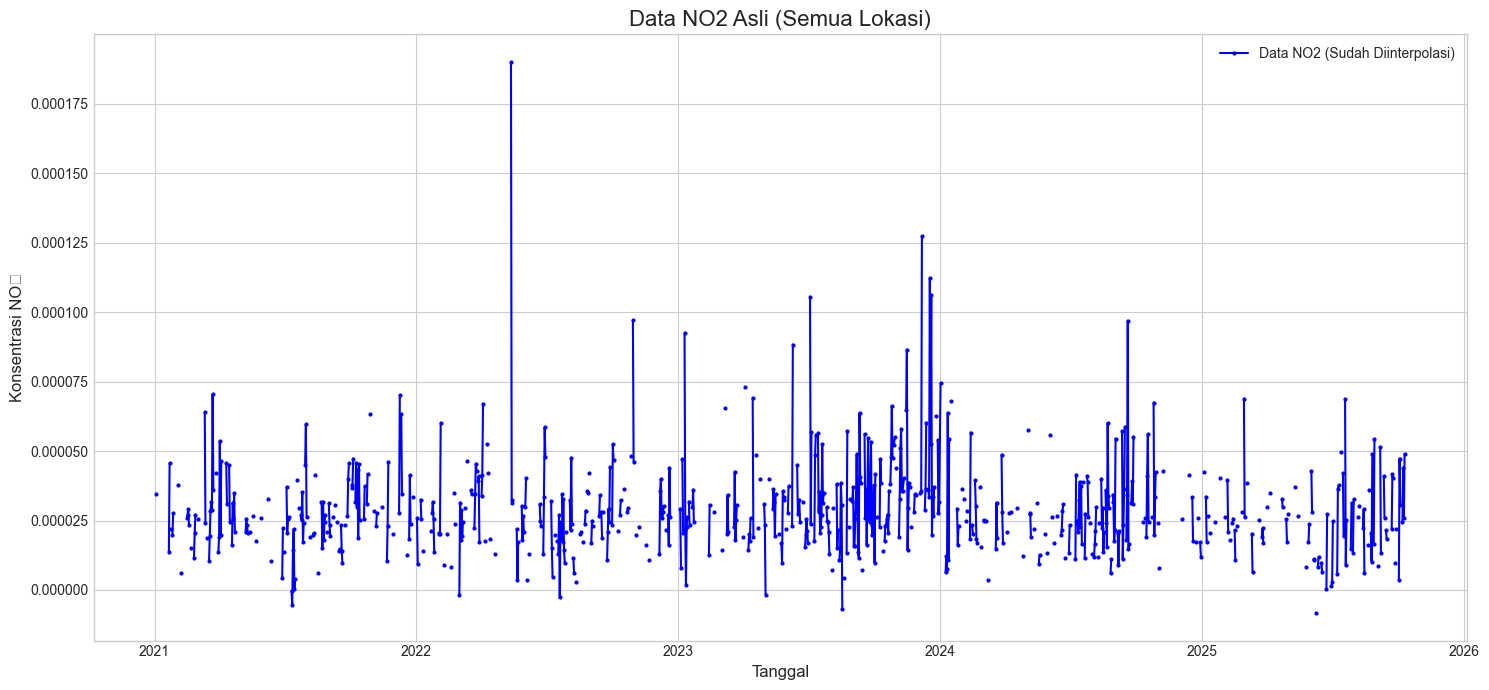

In [3]:
if 'df' in locals():
    # --- 3. VISUALISASI HASIL ---
    print("Membuat visualisasi data...")
    
    # Mengatur style grafik agar lebih bagus
    plt.style.use('seaborn-v0_8-whitegrid') 
    plt.figure(figsize=(15, 7)) # Mengatur ukuran gambar

    # Plot data (disesuaikan untuk data Anda yang sudah bersih)
    # Kita plot 'Time' vs 'NO2'
    plt.plot(
        df['Time'], 
        df['NO2'], 
        marker='o', 
        markersize=2, # Ukuran marker dikecilkan agar tidak terlalu penuh
        linestyle='-',  # Diubah menjadi garis solid karena data sudah bersih
        color='blue',     # Diubah menjadi biru
        label='Data NO2 (Sudah Diinterpolasi)'
    )

    # Memberi judul dan label
    plt.title('Data NO2 Asli (Semua Lokasi)', fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Konsentrasi NO₂', fontsize=12) # Label Y disesuaikan
    plt.legend()
    plt.tight_layout()

    # Menampilkan grafik
    plt.show()
else:
    print("DataFrame 'df' tidak terdefinisi. Harap jalankan cell sebelumnya.")

# Data Preprocessing

In [4]:

if 'df' in locals():
    print("Memulai Data Preprocessing (Alur Revisi)...")
    
    # 1. Menghapus Kolom tidak berguna (sesuai referensi)
    # Ini mengubah data kita dari multi-lokasi menjadi time-series tunggal
    df_cleaned = df.drop(columns=['Latitude (y)', 'Longitude (x)'])
    print("Kolom lokasi 'Latitude (y)' dan 'Longitude (x)' telah dihapus.")
    
    print("\n--- Data setelah drop kolom (5 baris) ---")
    print(df_cleaned.head())
    
    # 2. Koreksi nilai negatif menjadi NaN (sesuai referensi)
    missing_before = df_cleaned['NO2'].isnull().sum()
    print(f"\nMissing value SEBELUM koreksi nilai negatif: {missing_before} baris")
    
    # Ubah semua nilai NO2 < 0 menjadi NaN
    df_cleaned.loc[df_cleaned['NO2'] < 0, 'NO2'] = np.nan
    
    missing_after = df_cleaned['NO2'].isnull().sum()
    print(f"Missing value SETELAH koreksi nilai negatif: {missing_after} baris")
    print(f"({missing_after - missing_before} nilai negatif ditemukan dan diubah ke NaN)")
    
else:
    print("Error: DataFrame 'df' tidak ditemukan. Jalankan cell sebelumnya.")

Memulai Data Preprocessing (Alur Revisi)...
Kolom lokasi 'Latitude (y)' dan 'Longitude (x)' telah dihapus.

--- Data setelah drop kolom (5 baris) ---
        Time       NO2
0 2021-01-01       NaN
1 2021-01-02       NaN
2 2021-01-03  0.000034
3 2021-01-04       NaN
4 2021-01-05       NaN

Missing value SEBELUM koreksi nilai negatif: 1043 baris
Missing value SETELAH koreksi nilai negatif: 1050 baris
(7 nilai negatif ditemukan dan diubah ke NaN)


## Missing Value Interpolasi


Memulai proses interpolasi...

--- Jumlah Missing Value setelah interpolasi ---
Time           0
NO2            0
NO2_Asli    1050
dtype: int64

--- 5 baris pertama data hasil interpolasi ---
        Time       NO2  NO2_Asli
0 2021-01-01  0.000034       NaN
1 2021-01-02  0.000034       NaN
2 2021-01-03  0.000034  0.000034
3 2021-01-04  0.000033       NaN
4 2021-01-05  0.000032       NaN

Membuat plot perbandingan...


C:\Users\FIKRI\AppData\Local\Temp\ipykernel_4596\3959324268.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolated['NO2'] = df_interpolated['NO2'].fillna(method='ffill').fillna(method='bfill')
C:\Users\FIKRI\AppData\Local\Temp\ipykernel_4596\3959324268.py:57: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\FIKRI\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


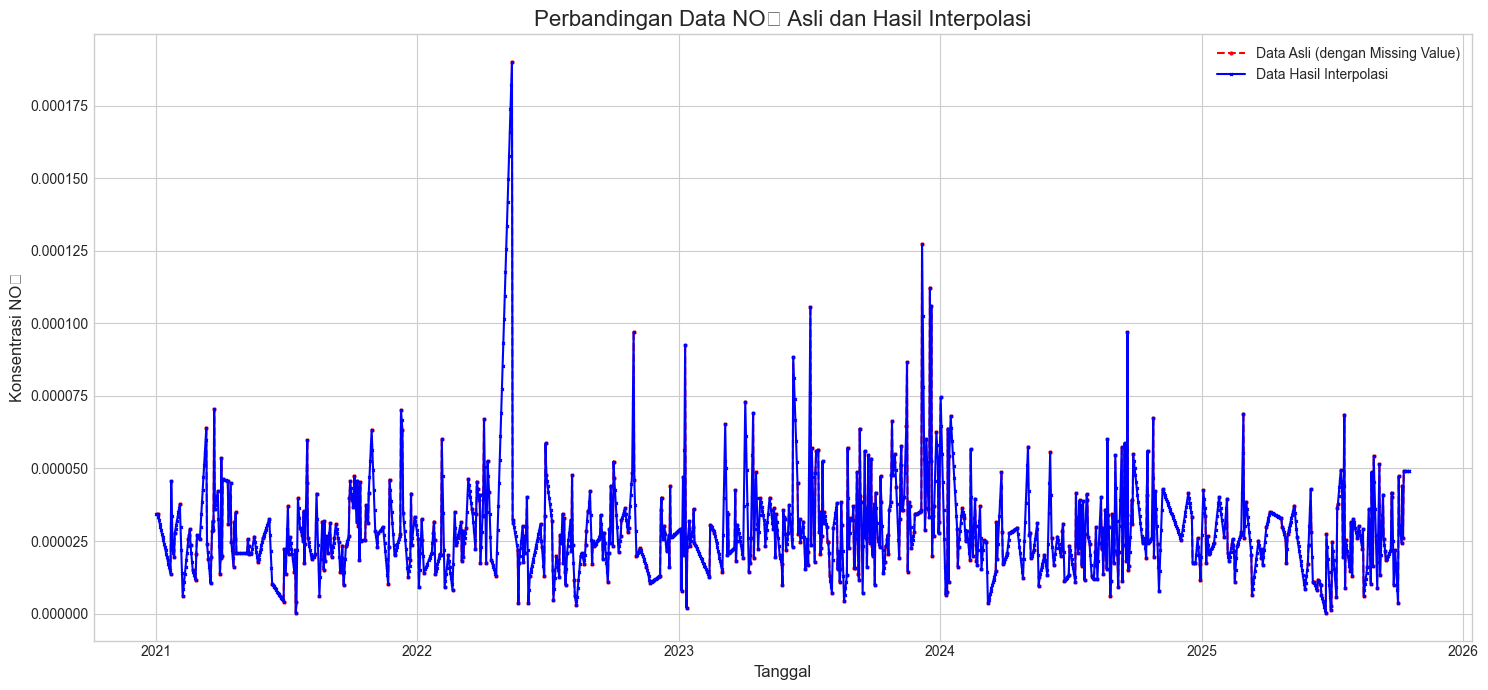


Proses Preprocessing & Interpolasi REVISI selesai.
Variabel 'data_bersih_final' siap untuk ACF.


In [5]:

if 'df_cleaned' in locals():
    print("\nMemulai proses interpolasi...")
    
    df_interpolated = df_cleaned.copy()
    
    # 1. Simpan data asli (bolong) untuk plotting
    df_interpolated['NO2_Asli'] = df_interpolated['NO2']
    
    # 2. Jadikan kolom 'Time' sebagai index (wajib untuk method='time')
    df_interpolated.set_index('Time', inplace=True)
    
    # 3. Lakukan interpolasi dengan metode 'time'
    df_interpolated['NO2'] = df_interpolated['NO2'].interpolate(method='time')
    
    # (Opsional) Isi sisa NaN di awal/akhir jika ada
    df_interpolated['NO2'] = df_interpolated['NO2'].fillna(method='ffill').fillna(method='bfill')
    
    # 4. Kembalikan index 'Time' menjadi kolom biasa
    df_interpolated.reset_index(inplace=True)
    
    print("\n--- Jumlah Missing Value setelah interpolasi ---")
    # Kolom 'NO2' sekarang harus 0, 'NO2_Asli' tetap bolong
    print(df_interpolated.isnull().sum())
    
    print("\n--- 5 baris pertama data hasil interpolasi ---")
    print(df_interpolated.head())

    # --- 5. VISUALISASI HASIL ---
    print("\nMembuat plot perbandingan...")
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(15, 7))

    # Plot data asli (merah, putus-putus)
    plt.plot(
        df_interpolated['Time'], 
        df_interpolated['NO2_Asli'], # Kolom asli yang kita simpan
        marker='o', markersize=2,
        linestyle='--', 
        color='red', 
        label='Data Asli (dengan Missing Value)'
    )
    
    # Plot data yang sudah diinterpolasi (biru, solid)
    plt.plot(
        df_interpolated['Time'], 
        df_interpolated['NO2'], # Kolom NO2 yang sudah bersih
        marker='x', markersize=2,
        linestyle='-', 
        color='blue', 
        label='Data Hasil Interpolasi'
    )

    plt.title('Perbandingan Data NO₂ Asli dan Hasil Interpolasi', fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Konsentrasi NO₂', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Simpan data bersih ini ke variabel baru untuk langkah selanjutnya
    data_bersih_final = df_interpolated[['Time', 'NO2']].copy()
    print("\nProses Preprocessing & Interpolasi REVISI selesai.")
    print("Variabel 'data_bersih_final' siap untuk ACF.")

else:
    print("Error: DataFrame 'df_cleaned' tidak ditemukan. Jalankan cell sebelumnya.")

## Outlier process
### sebelum proses outlier

--- Memulai Cell 6: Memproses Data Outliers ---

## 1. Menganalisis Outlier dengan Metode IQR ##
Batas Bawah (Lower Bound): -2.4757870468750053e-06
Batas Atas (Upper Bound): 5.6444349078125005e-05
IQR: 1.4730034031250003e-05

🔍 Ditemukan 76 outlier.
----------------------------------------

## 2. Visualisasi Outlier dengan Box Plot (Sebelum Capping) ##


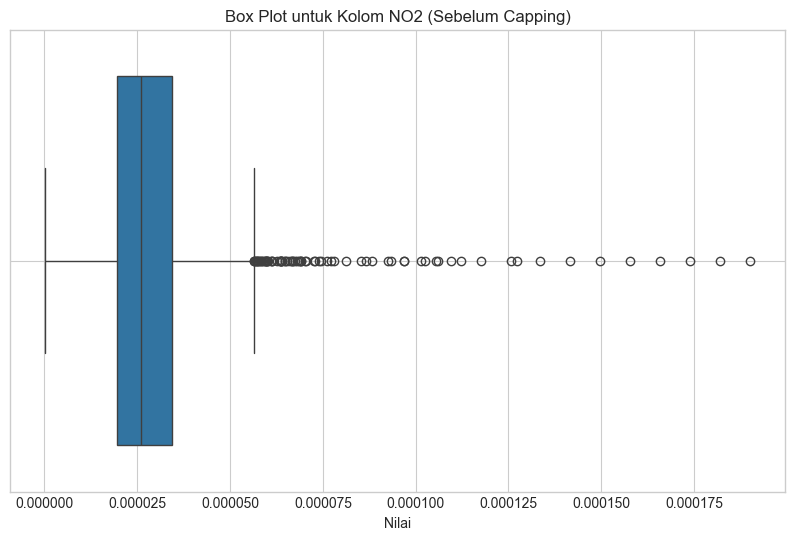


## 3. Melakukan Capping (Mengganti Outlier) ##
✅ Proses capping selesai.
----------------------------------------

## 4. Verifikasi Setelah Capping ##
Statistik deskriptif kolom NO2 setelah di-capping:
count    1.739000e+03
mean     2.765756e-05
std      1.216606e-05
min      2.115513e-07
25%      1.961926e-05
50%      2.602976e-05
75%      3.434930e-05
max      5.644435e-05
Name: NO2, dtype: float64

Min Baru: 2.1155134000e-07
Max Baru: 5.6444349078e-05

Proses Outlier Capping selesai.
Variabel 'data_capped_final' siap untuk ACF.


In [6]:

# Pastikan variabel 'data_bersih_final' dari cell sebelumnya ada
if 'data_bersih_final' not in locals():
    print("Error: Variabel 'data_bersih_final' tidak ditemukan.")
    print("Harap jalankan Cell 5 (Interpolasi) terlebih dahulu.")
else:
    print("--- Memulai Cell 6: Memproses Data Outliers ---")
    
    # 0. Ambil data dari cell sebelumnya
    df_processed = data_bersih_final.copy()
    kolom_target = 'NO2'
    data_kolom = df_processed[kolom_target]

    # --- 1. Menganalisis Outlier dengan Metode IQR ---
    print("\n## 1. Menganalisis Outlier dengan Metode IQR ##")
    
    Q1 = data_kolom.quantile(0.25)
    Q3 = data_kolom.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Batas Bawah (Lower Bound): {lower_bound}")
    print(f"Batas Atas (Upper Bound): {upper_bound}")
    print(f"IQR: {IQR}\n")
    
    # Cari data yang berada di luar batas (outlier)
    outliers = data_kolom[(data_kolom < lower_bound) | (data_kolom > upper_bound)]
    
    if not outliers.empty:
        print(f"🔍 Ditemukan {len(outliers)} outlier.")
    else:
        print("✅ Tidak ditemukan outlier pada kolom NO2.")
        
    print("-" * 40)
    
    # --- 2. Visualisasi Outlier dengan Box Plot (Sebelum Capping) ---
    print("\n## 2. Visualisasi Outlier dengan Box Plot (Sebelum Capping) ##")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_kolom)
    plt.title(f'Box Plot untuk Kolom {kolom_target} (Sebelum Capping)')
    plt.xlabel('Nilai')
    plt.grid(True)
    plt.show()

    # --- 3. Melakukan Capping Outlier ---
    print("\n## 3. Melakukan Capping (Mengganti Outlier) ##")
    
    # Buat DataFrame baru untuk data yang di-cap
    df_capped = df_processed.copy()
    
    # Gunakan np.clip untuk "menekan" nilai
    df_capped[kolom_target] = np.clip(df_capped[kolom_target], lower_bound, upper_bound)
    
    print("✅ Proses capping selesai.")
    print("-" * 40)
    
    # --- 4. Verifikasi Setelah Capping ---
    print("\n## 4. Verifikasi Setelah Capping ##")
    print("Statistik deskriptif kolom NO2 setelah di-capping:")
    print(df_capped[kolom_target].describe())
    
    # Cek Min/Max baru, seharusnya = lower/upper bound jika ada outlier
    new_min = df_capped[kolom_target].min()
    new_max = df_capped[kolom_target].max()
    
    print(f"\nMin Baru: {new_min:.10e}")
    print(f"Max Baru: {new_max:.10e}")
    
    # Simpan hasil akhir ini untuk cell selanjutnya
    data_capped_final = df_capped.copy()
    print("\nProses Outlier Capping selesai.")
    print("Variabel 'data_capped_final' siap untuk ACF.")

### Setelah Proses Outlier

In [7]:

if 'data_capped_final' not in locals():
    print("Error: Variabel 'data_capped_final' tidak ditemukan.")
    print("Harap jalankan Cell 6 (Outlier Capping) terlebih dahulu.")
else:
    print("--- Memulai Cell 7: Verifikasi Data Outlier ---")
    
    # 1. Menganalisis Ulang Outlier pada Data yang Sudah di-Capping
    print("\n## 1. Menganalisis Ulang Outlier dengan Metode IQR ##")
    
    kolom_target = 'NO2'
    # Kita gunakan data yang sudah di-cap: data_capped_final
    data_kolom = data_capped_final[kolom_target] 
    
    Q1 = data_kolom.quantile(0.25)
    Q3 = data_kolom.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Batas Bawah (Lower Bound) Baru: {lower_bound}")
    print(f"Batas Atas (Upper Bound) Baru: {upper_bound}")
    print(f"IQR Baru: {IQR}\n")
    
    # Cari data yang berada di luar batas (outlier)
    outliers = data_kolom[(data_kolom < lower_bound) | (data_kolom > upper_bound)]
    
    if not outliers.empty:
        print(f"🔍 PERINGATAN: Masih ditemukan {len(outliers)} outlier.")
        print(outliers)
    else:
        # Ini adalah output yang kita harapkan
        print("✅ Tidak ditemukan outlier pada kolom NO2.")
    
    print("\nProses Verifikasi Outlier selesai.")
    print("Variabel 'data_capped_final' siap untuk langkah selanjutnya (ACF).")

--- Memulai Cell 7: Verifikasi Data Outlier ---

## 1. Menganalisis Ulang Outlier dengan Metode IQR ##
Batas Bawah (Lower Bound) Baru: -2.4757870468750053e-06
Batas Atas (Upper Bound) Baru: 5.6444349078125005e-05
IQR Baru: 1.4730034031250003e-05

✅ Tidak ditemukan outlier pada kolom NO2.

Proses Verifikasi Outlier selesai.
Variabel 'data_capped_final' siap untuk langkah selanjutnya (ACF).


## Supervised

In [8]:


if 'data_capped_final' not in locals():
    print("Error: Variabel 'data_capped_final' tidak ditemukan.")
    print("Harap jalankan Cell 7 (Verifikasi Outlier) terlebih dahulu.")
else:
    print("--- Memulai Cell 8: Konversi ke Supervised ---")
    
    # --- FUNGSI UNTUK KONVERSI TIME SERIES KE SUPERVISED ---
    # (Diambil dari referensi Anda)
    def series_to_supervised(data, n_in=30, n_out=1, dropnan=True):
        """
        Mengubah series waktu menjadi dataset supervised.
        Arguments:
            data: DataFrame atau Series input.
            n_in: Jumlah observasi lampau (X).
            n_out: Jumlah observasi masa depan (y).
            dropnan: Boolean apakah akan menghapus baris dengan nilai NaN.
        Returns:
            Pandas DataFrame yang sudah diformat untuk supervised learning.
        """
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            # Kolom akan bernama f(t-30), f(t-29), ... f(t-1)
            names.append('f(t-%i)' % (i)) 
            
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names.append('target') # Kolom target akan bernama 'target'
            else:
                names.append('f(t+%i)' % (i))
                
        # Gabungkan semua
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        
        # Hapus baris dengan nilai NaN (yang muncul akibat shifting)
        if dropnan:
            agg.dropna(inplace=True)
        return agg

    # --- Gunakan Fungsi ---
    
    # 1. Ambil kolom NO2 yang sudah bersih (di-cap)
    # Kita gunakan variabel 'data_capped_final' dari Cell 7
    data_no2 = data_capped_final[['NO2']]
    
    # 2. Tentukan jumlah lag (fitur)
    n_lags = 30
    
    # 3. Ubah menjadi format supervised
    df_supervised = series_to_supervised(data_no2, n_in=n_lags)
    
    # --- TAMPILKAN HASILNYA ---
    print("✅ Konversi ke dataset supervised berhasil.")
    print(f"Dimensi data baru: {df_supervised.shape}")
    print("\n5 baris pertama dari dataset supervised:")
    print(df_supervised.head())
    
    print("\nProses Konversi Supervised selesai.")
    print("Variabel 'df_supervised' siap untuk langkah selanjutnya.")

--- Memulai Cell 8: Konversi ke Supervised ---
✅ Konversi ke dataset supervised berhasil.
Dimensi data baru: (1709, 31)

5 baris pertama dari dataset supervised:
     f(t-30)   f(t-29)   f(t-28)   f(t-27)   f(t-26)   f(t-25)   f(t-24)  \
30  0.000034  0.000034  0.000034  0.000033  0.000032  0.000031  0.000030   
31  0.000034  0.000034  0.000033  0.000032  0.000031  0.000030  0.000029   
32  0.000034  0.000033  0.000032  0.000031  0.000030  0.000029  0.000028   
33  0.000033  0.000032  0.000031  0.000030  0.000029  0.000028  0.000026   
34  0.000032  0.000031  0.000030  0.000029  0.000028  0.000026  0.000025   

     f(t-23)   f(t-22)   f(t-21)  ...    f(t-9)    f(t-8)    f(t-7)    f(t-6)  \
30  0.000029  0.000028  0.000026  ...  0.000046  0.000034  0.000022  0.000021   
31  0.000028  0.000026  0.000025  ...  0.000034  0.000022  0.000021  0.000020   
32  0.000026  0.000025  0.000024  ...  0.000022  0.000021  0.000020  0.000028   
33  0.000025  0.000024  0.000023  ...  0.000021  0.000020

## Auto Corelation

--- Memulai Cell 9: Seleksi Fitur (Autocorrelation) ---

## Korelasi Setiap Fitur Lag terhadap 'target' ##
f(t-1)     0.717311
f(t-2)     0.524511
f(t-3)     0.398178
f(t-4)     0.328104
f(t-5)     0.267010
f(t-6)     0.217347
f(t-7)     0.175426
f(t-8)     0.133061
f(t-13)    0.127455
f(t-9)     0.121960
f(t-17)    0.121915
f(t-12)    0.118884
f(t-10)    0.114011
f(t-16)    0.110187
f(t-18)    0.108495
f(t-11)    0.108404
f(t-15)    0.105477
f(t-14)    0.103570
f(t-29)    0.102792
f(t-28)    0.100127
f(t-19)    0.095399
f(t-27)    0.094009
f(t-22)    0.088879
f(t-20)    0.085094
f(t-23)    0.080739
f(t-26)    0.077836
f(t-24)    0.075591
f(t-30)    0.068085
f(t-25)    0.066249
f(t-21)    0.065017
Name: target, dtype: float64
--------------------------------------------------

Membuat visualisasi korelasi (Gaya Berbeda: Vertical Bar Plot)...


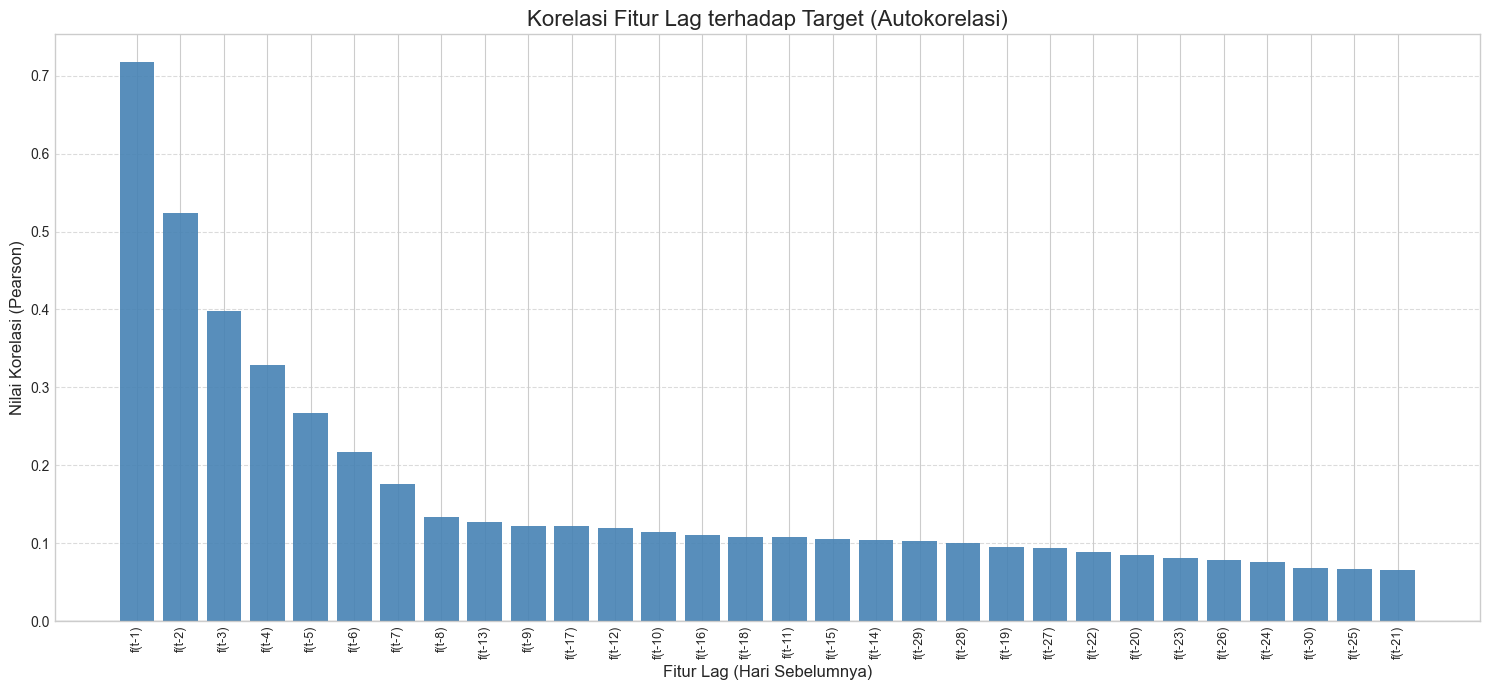


Berdasarkan analisis, 10 fitur teratas telah dipilih:
['f(t-1)', 'f(t-2)', 'f(t-3)', 'f(t-4)', 'f(t-5)', 'f(t-6)', 'f(t-7)', 'f(t-8)', 'f(t-13)', 'f(t-9)']

Proses Seleksi Fitur selesai.
Variabel 'df_supervised' dan 'selected_features' siap untuk Cell 10.


In [9]:

if 'df_supervised' not in locals():
    print("Error: Variabel 'df_supervised' tidak ditemukan.")
    print("Harap jalankan Cell 8 (Konversi Supervised) terlebih dahulu.")
else:
    print("--- Memulai Cell 9: Seleksi Fitur (Autocorrelation) ---")
    
    # --- 1. Hitung Korelasi (Sama seperti referensi) ---
    # Membuat correlation matrix
    corr_matrix = df_supervised.corr()
    
    # 2. Fokus pada korelasi dengan Kolom 'target'
    # Ambil kolom 'target', hapus korelasi dirinya sendiri (1.0), dan urutkan
    target_corr = corr_matrix['target'].drop('target').sort_values(ascending=False)
    
    # --- 3. Tampilkan Skor Korelasi ---
    print("\n## Korelasi Setiap Fitur Lag terhadap 'target' ##")
    print(target_corr)
    print("-" * 50)
    
    # --- 4. VISUALISASI (GAYA BERBEDA) ---
    print("\nMembuat visualisasi korelasi (Gaya Berbeda: Vertical Bar Plot)...")
    
    # Kita gunakan plot batang VERTIKAL dari matplotlib
    plt.figure(figsize=(15, 7)) # Buat figur lebih lebar
    
    # Buat plot batang: x = nama fitur, y = nilai korelasi
    plt.bar(target_corr.index, target_corr.values, color='steelblue', alpha=0.9)
    
    # Menambahkan garis 'nol' untuk referensi
    plt.axhline(0, color='black', linewidth=0.8)
    
    # Kustomisasi
    plt.title('Korelasi Fitur Lag terhadap Target (Autokorelasi)', fontsize=16)
    plt.xlabel('Fitur Lag (Hari Sebelumnya)', fontsize=12)
    plt.ylabel('Nilai Korelasi (Pearson)', fontsize=12)
    
    # Putar label x (f(t-1), f(t-2), ...) agar vertikal dan mudah dibaca
    plt.xticks(rotation=90, fontsize=9) 
    plt.yticks(fontsize=10)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Garis grid horizontal
    plt.tight_layout() # Merapikan plot
    plt.show()

    # --- 5. Persiapan untuk Langkah Selanjutnya ---
    # Berdasarkan referensi teman Anda, langkah selanjutnya adalah memilih N fitur teratas
    n_top_features = 10 # Teman Anda memilih 10 fitur teratas
    
    # Ambil 10 nama fitur dengan korelasi tertinggi
    selected_features = target_corr.head(n_top_features).index
    
    print(f"\nBerdasarkan analisis, {n_top_features} fitur teratas telah dipilih:")
    print(list(selected_features))
    
    print("\nProses Seleksi Fitur selesai.")
    print("Variabel 'df_supervised' dan 'selected_features' siap untuk Cell 10.")

## Pilih featur yang nilainya >0.5

In [10]:

if 'target_corr' not in locals():
    print("Error: Variabel 'target_corr' tidak ditemukan.")
    print("Harap jalankan Cell 9 (Seleksi Fitur) terlebih dahulu.")
else:
    print("--- Memulai Cell 10: Filter Fitur (Korelasi > 0.5) ---")
    
    # --- 1. Tentukan Ambang Batas ---
    threshold = 0.5
    
    # --- 2. Filter Series korelasi ---
    # Ambil fitur yang korelasinya > 0.5
    highly_correlated_features = target_corr[target_corr > threshold]
    
    # Ambil nama-nama kolomnya
    selected_features_final = highly_correlated_features.index.tolist()
    
    # --- 3. Tampilkan Hasilnya untuk Verifikasi ---
    print(f"✅ Seleksi fitur dengan ambang batas korelasi > {threshold} selesai.")
    print("-" * 50)
    
    # df_supervised.columns - 1 (karena 1 kolom adalah 'target')
    print(f"Jumlah fitur asli: {len(df_supervised.columns) - 1}") 
    print(f"Jumlah fitur terpilih: {len(selected_features_final)}")
    print("\nNama-nama fitur yang terpilih:")
    print(selected_features_final)
    
    print("\nProses Seleksi Fitur selesai.")
    print("Variabel 'df_supervised' dan 'selected_features_final' siap untuk Cell 11 (Split Data).")

--- Memulai Cell 10: Filter Fitur (Korelasi > 0.5) ---
✅ Seleksi fitur dengan ambang batas korelasi > 0.5 selesai.
--------------------------------------------------
Jumlah fitur asli: 30
Jumlah fitur terpilih: 2

Nama-nama fitur yang terpilih:
['f(t-1)', 'f(t-2)']

Proses Seleksi Fitur selesai.
Variabel 'df_supervised' dan 'selected_features_final' siap untuk Cell 11 (Split Data).


## Bagi Data menjadi Data Train dan Data Test

In [11]:


# Pastikan variabel dari cell sebelumnya ada
if 'df_supervised' not in locals() or 'selected_features_final' not in locals():
    print("Error: Variabel 'df_supervised' atau 'selected_features_final' tidak ditemukan.")
    print("Harap jalankan Cell 10 (Filter Fitur) terlebih dahulu.")
else:
    print("--- Memulai Cell 11: Membagi Data Train & Test ---")
    
    # --- 1. Pisahkan antara Fitur (X) dan Target (y) ---
    # X adalah fitur-fitur yang sudah kita pilih
    X = df_supervised[selected_features_final]
    # y adalah kolom target
    y = df_supervised['target']

    # --- 2. Tentukan titik pembagian (80% dari total data) ---
    n_rows = len(df_supervised)
    split_point = int(n_rows * 0.8)

    # --- 3. Lakukan Pembagian Data secara Kronologis ---
    X_train, X_test = X[:split_point], X[split_point:]
    y_train, y_test = y[:split_point], y[split_point:]

    # --- 4. Tampilkan Hasil Pembagian ---
    print("✅ Pembagian data selesai.")
    print("-" * 40)
    print(f"Jumlah total baris data: {n_rows}")
    print(f"Titik pembagian (indeks): {split_point}\n")
    
    print("Dimensi Data Latih (Training):")
    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    
    print("\nDimensi Data Uji (Testing):")
    print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
    
    print("\nProses Pembagian Data selesai.")
    print("Variabel siap untuk Cell 12 (Normalisasi).")

--- Memulai Cell 11: Membagi Data Train & Test ---
✅ Pembagian data selesai.
----------------------------------------
Jumlah total baris data: 1709
Titik pembagian (indeks): 1367

Dimensi Data Latih (Training):
X_train: (1367, 2), y_train: (1367,)

Dimensi Data Uji (Testing):
X_test: (342, 2), y_test: (342,)

Proses Pembagian Data selesai.
Variabel siap untuk Cell 12 (Normalisasi).


## Normalisasi Min-Max

In [12]:


# Pastikan variabel dari cell sebelumnya ada
if 'X_train' not in locals():
    print("Error: Variabel 'X_train' tidak ditemukan.")
    print("Harap jalankan Cell 11 (Split Data) terlebih dahulu.")
else:
    print("--- Memulai Cell 12: Normalisasi Data ---")
    
    # --- 1. Buat Scaler ---
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    # --- 2. Fit scaler HANYA pada Data Latih (Training Data) ---
    # Scaler belajar rentang min-max dari data training
    # .fit_transform() = .fit() lalu .transform()
    X_train_scaled = scaler_X.fit_transform(X_train)
    
    # Untuk y, kita perlu reshape jadi 2D (-1, 1) agar scaler bekerja
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

    # --- 3. Gunakan Scaler yang SAMA untuk Transformasi Data Uji ---
    # Scaler menerapkan aturan yang sama dari data training ke data testing
    # KITA HANYA MENGGUNAKAN .transform() (BUKAN .fit_transform())
    X_test_scaled = scaler_X.transform(X_test)
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

    # --- 4. Tampilkan Hasil ---
    print("✅ Normalisasi Min-Max selesai.")
    print("-" * 40)
    print(f"Dimensi X_train setelah di-scaling: {X_train_scaled.shape}")
    print(f"Dimensi X_test setelah di-scaling: {X_test_scaled.shape}\n")
    
    print("Tampilkan contoh data untuk verifikasi:")
    print("Contoh 5 baris pertama dari X_train yang sudah dinormalisasi:")
    print(X_train_scaled[:5])
    
    print("\nNilai min dari data yang sudah dinormalisasi:", np.min(X_train_scaled))
    print("Nilai max dari data yang sudah dinormalisasi:", np.max(X_train_scaled))
    
    print("\nProses Normalisasi selesai.")
    print("Data siap untuk modeling (Cell 13).")

--- Memulai Cell 12: Normalisasi Data ---
✅ Normalisasi Min-Max selesai.
----------------------------------------
Dimensi X_train setelah di-scaling: (1367, 2)
Dimensi X_test setelah di-scaling: (342, 2)

Tampilkan contoh data untuk verifikasi:
Contoh 5 baris pertama dari X_train yang sudah dinormalisasi:
[[0.56553549 0.53997308]
 [0.5910979  0.56553549]
 [0.61666031 0.5910979 ]
 [0.64222271 0.61666031]
 [0.66778512 0.64222271]]

Nilai min dari data yang sudah dinormalisasi: 0.0
Nilai max dari data yang sudah dinormalisasi: 1.0

Proses Normalisasi selesai.
Data siap untuk modeling (Cell 13).


# Melakukan Modeling

In [13]:


# Pastikan variabel dari cell sebelumnya ada
if 'X_train_scaled' not in locals():
    print("Error: Variabel 'X_train_scaled' tidak ditemukan.")
    print("Harap jalankan Cell 12 (Normalisasi) terlebih dahulu.")
else:
    print("--- Memulai Cell 13: Modeling ---")
    
    # --- 1. Inisialisasi dan Latih Model KNN ---
    # Sesuai screenshot, teman Anda menggunakan k=29
    value_knn = 29
    
    print(f"Menginisialisasi model K-NN dengan k={value_knn}...")
    knn_model = KNeighborsRegressor(n_neighbors=value_knn)
    
    # Latih model menggunakan data training
    # .ravel() mengubah y_train_scaled menjadi 1D agar sesuai format .fit()
    knn_model.fit(X_train_scaled, y_train_scaled.ravel())
    
    print("✅ Model KNN berhasil dilatih.")
    print("-" * 40)
    
    # --- 2. Lakukan Prediksi pada Data Uji ---
    print("Melakukan prediksi pada data uji...")
    # Model akan memprediksi nilai y berdasarkan X_test_scaled
    y_pred_scaled = knn_model.predict(X_test_scaled)
    
    print("✅ Prediksi pada data uji selesai.")
    print("-" * 40)

    # --- 3. Denormalisasi Hasil Prediksi ---
    print("Melakukan denormalisasi hasil prediksi...")
    # Kita harus kembalikan skala 0-1 ke nilai aslinya
    
    # Denormalisasi hasil prediksi
    # .reshape(-1, 1) mengubah array 1D menjadi 2D
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    
    # Denormalisasi data y_test asli untuk perbandingan
    y_test_actual = scaler_y.inverse_transform(y_test_scaled)
    
    print("✅ Denormalisasi hasil prediksi selesai.")
    print("-" * 40)
    
    # --- 4. Tampilkan dan Bandingkan Hasil ---
    print("Membuat tabel perbandingan...")
    
    # Buat DataFrame untuk membandingkan nilai aktual dengan prediksi
    # .flatten() mengubah array 2D kembali jadi 1D
    comparison_df = pd.DataFrame({
        'Nilai Aktual': y_test_actual.flatten(),
        'Hasil Prediksi': y_pred.flatten()
    })
    
    print("\n## Perbandingan Nilai Aktual vs Hasil Prediksi ##")
    # Menampilkan 10 hasil pertama
    print(comparison_df.head(10))

    print("\nProses Modeling selesai.")
    print("Variabel 'comparison_df', 'y_test_actual', dan 'y_pred' siap untuk Cell 14 (Evaluasi).")

--- Memulai Cell 13: Modeling ---
Menginisialisasi model K-NN dengan k=29...
✅ Model KNN berhasil dilatih.
----------------------------------------
Melakukan prediksi pada data uji...
✅ Prediksi pada data uji selesai.
----------------------------------------
Melakukan denormalisasi hasil prediksi...
✅ Denormalisasi hasil prediksi selesai.
----------------------------------------
Membuat tabel perbandingan...

## Perbandingan Nilai Aktual vs Hasil Prediksi ##
   Nilai Aktual  Hasil Prediksi
0      0.000041        0.000037
1      0.000041        0.000037
2      0.000040        0.000036
3      0.000039        0.000036
4      0.000039        0.000035
5      0.000038        0.000035
6      0.000037        0.000035
7      0.000037        0.000035
8      0.000036        0.000036
9      0.000035        0.000036

Proses Modeling selesai.
Variabel 'comparison_df', 'y_test_actual', dan 'y_pred' siap untuk Cell 14 (Evaluasi).


## Melakukan Evaluasi Model

--- Memulai Cell 14: Evaluasi Model ---

## Hasil Evaluasi Kinerja Model KNN ##
----------------------------------------
Mean Squared Error (MSE): 0.0000000001
R-Squared (R2 Score): 0.5550
Mean Absolute Percentage Error (MAPE): 39.14%
Mean Relative Error (MRE): -28.47%
----------------------------------------
Membuat plot perbandingan Aktual vs. Prediksi...


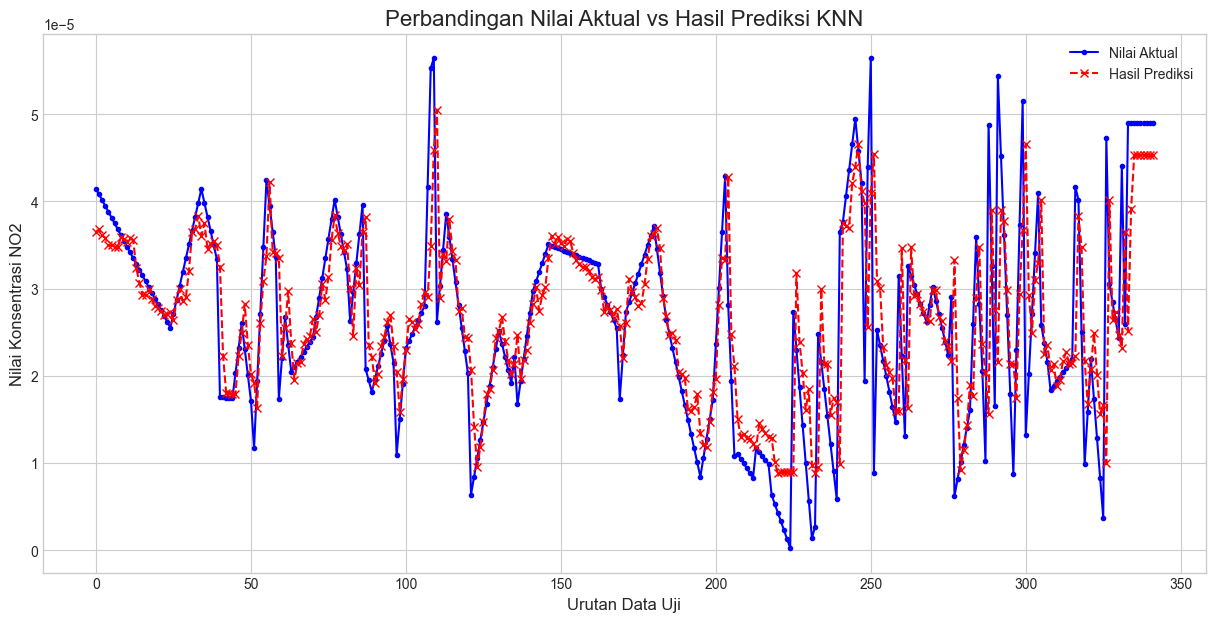


Proses Evaluasi Model selesai.


In [14]:

# Pastikan variabel dari cell sebelumnya ada
if 'y_test_actual' not in locals() or 'y_pred' not in locals():
    print("Error: Variabel 'y_test_actual' atau 'y_pred' tidak ditemukan.")
    print("Harap jalankan Cell 13 (Modeling) terlebih dahulu.")
else:
    print("--- Memulai Cell 14: Evaluasi Model ---")

    # --- 1. Hitung Metrik Evaluasi ---
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test_actual, y_pred)
    
    # R-squared (R2)
    r2 = r2_score(y_test_actual, y_pred)
    
    # Mean Absolute Percentage Error (MAPE)
    # Kita tambahkan nilai kecil (epsilon) untuk menghindari pembagian dengan nol
    epsilon = 1e-10 
    mape = np.mean(np.abs((y_test_actual - y_pred) / (y_test_actual + epsilon))) * 100
    
    # Mean Relative Error (MRE)
    mre = np.mean((y_test_actual - y_pred) / (y_test_actual + epsilon)) * 100

    # --- 2. Tampilkan Hasil Evaluasi ---
    print("\n## Hasil Evaluasi Kinerja Model KNN ##")
    print("-" * 40)
    print(f"Mean Squared Error (MSE): {mse:.10f}")
    print(f"R-Squared (R2 Score): {r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Mean Relative Error (MRE): {mre:.2f}%")
    print("-" * 40)

    # --- 3. Visualisasi Hasil Prediksi vs Aktual ---
    print("Membuat plot perbandingan Aktual vs. Prediksi...")
    plt.figure(figsize=(15, 7))
    plt.plot(y_test_actual, label='Nilai Aktual', color='blue', marker='.', linestyle='-')
    plt.plot(y_pred, label='Hasil Prediksi', color='red', marker='x', linestyle='--')
    plt.title('Perbandingan Nilai Aktual vs Hasil Prediksi KNN', fontsize=16)
    plt.xlabel('Urutan Data Uji', fontsize=12)
    plt.ylabel('Nilai Konsentrasi NO2', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\nProses Evaluasi Model selesai.")

## Mencari Nilai K-Optimal

--- Memulai Cell 15: Mencari Nilai K Optimal ---
Memulai pencarian nilai k optimal...
Mencoba k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
Pencarian selesai.
----------------------------------------
✅ Nilai 'k' paling optimal ditemukan: 29
Dengan Skor R-squared (R2) terbaik: 0.5550
----------------------------------------
Membuat plot R-squared vs. Nilai K...


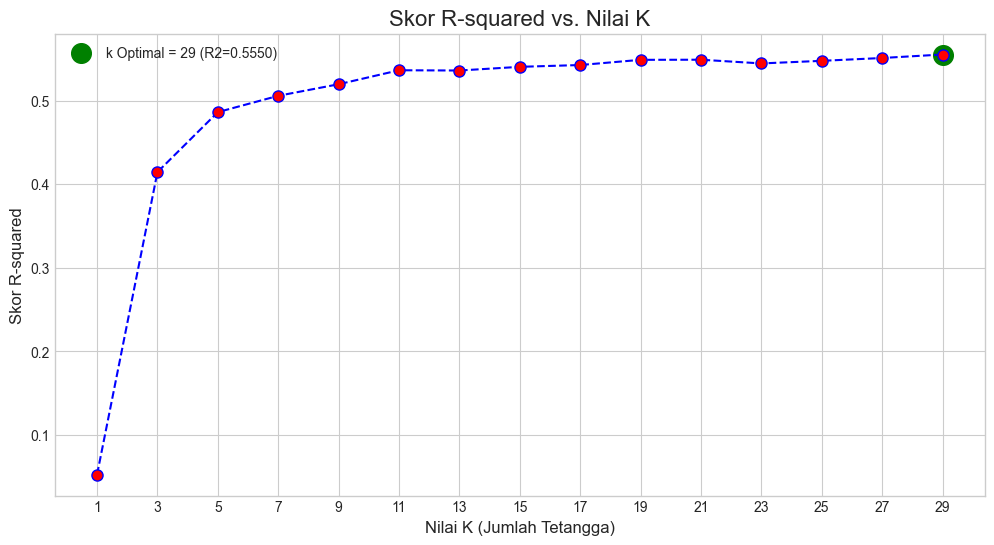


Proses Eksperimen K-NN selesai.


In [15]:

# Pastikan variabel dari cell normalisasi ada
if 'X_train_scaled' not in locals():
    print("Error: Variabel 'X_train_scaled' tidak ditemukan.")
    print("Harap jalankan Cell 12 (Normalisasi) terlebih dahulu.")
else:
    print("--- Memulai Cell 15: Mencari Nilai K Optimal ---")

    # --- 1. Siapkan Variabel ---
    
    # K-Values: range(1, 31, 2) artinya [1, 3, 5, ..., 29]
    k_values = range(1, 31, 2)
    
    # Siapkan list kosong untuk menyimpan hasil skor
    r2_scores = []
    
    # Mulai dari nilai minus tak hingga
    best_r2_score = -np.inf 
    best_k = 0

    print("Memulai pencarian nilai k optimal...")
    print("Mencoba k =", list(k_values))
    
    # --- 2. Lakukan Looping dan Evaluasi ---
    for k in k_values:
        # Buat Model KNN baru dengan nilai k saat ini
        knn_model = KNeighborsRegressor(n_neighbors=k)
        
        # Latih model
        knn_model.fit(X_train_scaled, y_train_scaled.ravel())
        
        # Lakukan prediksi
        y_pred_scaled = knn_model.predict(X_test_scaled)
        
        # PENTING: Denormalisasi hasil sebelum evaluasi
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
        y_test_actual = scaler_y.inverse_transform(y_test_scaled) # Definisikan ulang di sini
        
        # Hitung skor R2 dan simpan hasilnya
        current_r2 = r2_score(y_test_actual, y_pred)
        r2_scores.append(current_r2)
        
        # Periksa apakah skor k saat ini adalah yang terbaik
        if current_r2 > best_r2_score:
            best_r2_score = current_r2
            best_k = k
            
    print("Pencarian selesai.")
    print("-" * 40)

    # --- 3. Tampilkan Hasil Terbaik ---
    print(f"✅ Nilai 'k' paling optimal ditemukan: {best_k}")
    print(f"Dengan Skor R-squared (R2) terbaik: {best_r2_score:.4f}")
    print("-" * 40)
    
    # --- 4. Visualisasi Elbow Plot ---
    print("Membuat plot R-squared vs. Nilai K...")
    plt.figure(figsize=(12, 6))
    
    # Plot garis
    plt.plot(k_values, r2_scores, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=8)
    
    # Tandai titik k terbaik
    plt.scatter(best_k, best_r2_score, color='green', s=200, 
                label=f'k Optimal = {best_k} (R2={best_r2_score:.4f})')
    
    plt.title('Skor R-squared vs. Nilai K', fontsize=16)
    plt.xlabel('Nilai K (Jumlah Tetangga)', fontsize=12)
    plt.ylabel('Skor R-squared', fontsize=12)
    plt.xticks(k_values) # Tampilkan semua k yang diuji di sumbu x
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("\nProses Eksperimen K-NN selesai.")